In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt


In [3]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

get_ipython().run_line_magic('matplotlib', 'inline')

In [6]:
df = pd.read_csv('aapl.csv', parse_dates=['Date'])
df.head(3)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-11-30,1.234375,1.243304,1.133929,1.140625,0.763834,140372400
1,1998-12-01,1.142857,1.243304,1.129464,1.218750,0.816152,216434400
2,1998-12-02,1.218750,1.316964,1.196429,1.285714,0.860995,240620800


In [7]:
print (df.describe())
print ("=============================================================")
print (df.dtypes)


              Open         High          Low        Close    Adj Close  \
count  5033.000000  5033.000000  5033.000000  5033.000000  5033.000000   
mean     48.474497    48.929859    47.989695    48.470623    42.320780   
std      55.141765    55.592274    54.685168    55.148818    53.948688   
min       0.927857     0.942143     0.908571     0.937143     0.627570   
25%       3.160714     3.276786     3.071429     3.194196     2.139034   
50%      22.700001    23.171429    22.357143    22.840000    15.295103   
75%      84.620003    85.278572    83.765717    84.618568    66.075813   
max     230.779999   233.470001   229.779999   232.070007   231.263092   

             Volume  
count  5.033000e+03  
mean   1.207779e+08  
std    9.910582e+07  
min    9.835000e+06  
25%    5.413940e+07  
50%    9.420460e+07  
75%    1.571255e+08  
max    1.855410e+09  
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               flo

In [8]:
df1 = df[['Date','Close']]
df1.head(3)

,Date,Close
0,1998-11-30,1.140625
1,1998-12-01,1.218750
2,1998-12-02,1.285714


In [9]:
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print ("========================")
print (df_ts.tail(3))


<class 'pandas.core.frame.DataFrame'>
               Close
Date                
1998-11-30  1.140625
1998-12-01  1.218750
1998-12-02  1.285714
                 Close
Date                  
2018-11-26  174.619995
2018-11-27  174.240005
2018-11-28  180.940002


In [10]:
df_ts[df_ts.isnull()]

,Close
Date,
1998-11-30,NaN
1998-12-01,NaN
1998-12-02,NaN
1998-12-03,NaN
1998-12-04,NaN
...,...
2018-11-21,NaN
2018-11-23,NaN
2018-11-26,NaN


In [11]:
len(df_ts[df_ts.isnull()])


5033

In [12]:
df_ts = df_ts.sort_index()
df_ts.index

DatetimeIndex(['1998-11-30', '1998-12-01', '1998-12-02', '1998-12-03',
               '1998-12-04', '1998-12-07', '1998-12-08', '1998-12-09',
               '1998-12-10', '1998-12-11',
               ...
               '2018-11-14', '2018-11-15', '2018-11-16', '2018-11-19',
               '2018-11-20', '2018-11-21', '2018-11-23', '2018-11-26',
               '2018-11-27', '2018-11-28'],
              dtype='datetime64[ns]', name='Date', length=5033, freq=None)

In [13]:
df_ts.Close.fillna(method='pad', inplace=True)


In [14]:
df_ts[df_ts.Close.isnull()]
len(df_ts[df_ts.Close.isnull()])

0

<AxesSubplot:xlabel='Date'>

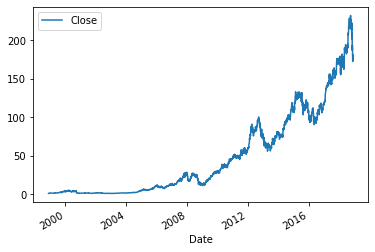

In [15]:
df_ts.plot()

In [16]:
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    print ("==============================================")
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

In [17]:
# Stationarity Check - Lets do a quick check on Stationarity with Dickey Fuller Test 
# Convert the DF to series first
ts = df_ts['Close']
test_stationarity(ts)


Results of Dickey-Fuller Test:
Test Statistic                    0.801293
p-value                           0.991657
#lags Used                       31.000000
Number of Observations Used    5001.000000
Critical Value (1%)              -3.431658
Critical Value (5%)              -2.862118
Critical Value (10%)             -2.567078
dtype: float64


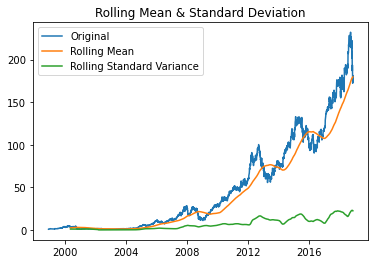

In [18]:
rolmean = ts.rolling(window=365).mean()
rolvar = ts.rolling(window=365).std()

plt.plot(ts, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

NameError: name 'rolstd' is not defined

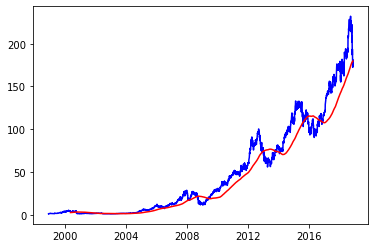

In [19]:
orig=plt.plot(ts, color='blue', label='Original')
mean=plt.plot(rolmean, color='red', label='rMean')
std=plt.plot(rolstd, color='black', label='rStd')
plt.legend(loc='best')
plt.title('Rolling Mean & STD')
plt.show(block=False)

results of dikey-fuller test:
Test Statistic             0.801293
p-value                    0.991657
#lags Used                31.000000
#observations           5001.000000
Critical value (1%)       -3.431658
Critical value (5%)       -2.862118
Critical value (10%)      -2.567078
dtype: float64


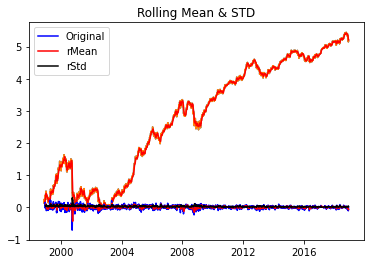

results of dikey-fuller test:
Test Statistic         -1.298667e+01
p-value                 2.868709e-24
#lags Used              2.100000e+01
#observations           5.000000e+03
Critical value (1%)    -3.431659e+00
Critical value (5%)    -2.862118e+00
Critical value (10%)   -2.567078e+00
dtype: float64


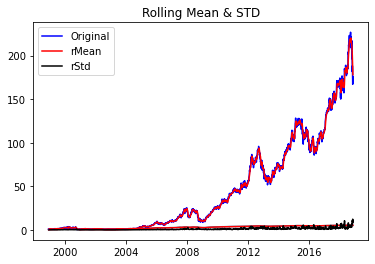

results of dikey-fuller test:
Test Statistic             0.803416
p-value                    0.991691
#lags Used                31.000000
#observations           5001.000000
Critical value (1%)       -3.431658
Critical value (5%)       -2.862118
Critical value (10%)      -2.567078
dtype: float64


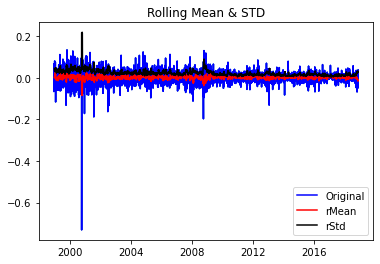

results of dikey-fuller test:
Test Statistic         -1.520099e+01
p-value                 5.830139e-28
#lags Used              2.000000e+01
#observations           5.011000e+03
Critical value (1%)    -3.431656e+00
Critical value (5%)    -2.862117e+00
Critical value (10%)   -2.567077e+00
dtype: float64


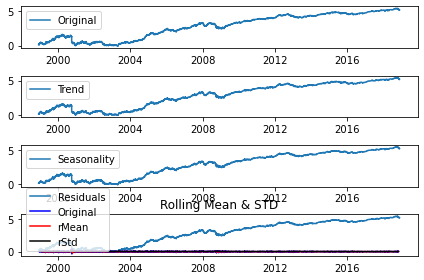

results of dikey-fuller test:
Test Statistic         -1.877137e+01
p-value                 2.025167e-30
#lags Used              3.200000e+01
#observations           4.970000e+03
Critical value (1%)    -3.431666e+00
Critical value (5%)    -2.862122e+00
Critical value (10%)   -2.567080e+00
dtype: float64


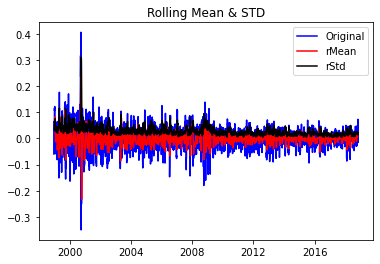

results of dikey-fuller test:
Test Statistic         -1.877137e+01
p-value                 2.025167e-30
#lags Used              3.200000e+01
#observations           4.970000e+03
Critical value (1%)    -3.431666e+00
Critical value (5%)    -2.862122e+00
Critical value (10%)   -2.567080e+00
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting AR Model


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Date
1998-12-01    0.001007
1998-12-02   -0.000933
1998-12-03    0.000985
1998-12-04    0.002953
1998-12-07    0.000327
dtype: float64
Date
1998-12-01    0.001007
1998-12-02    0.000073
1998-12-03    0.001058
1998-12-04    0.004012
1998-12-07    0.004338
                ...   
2018-11-21    5.061599
2018-11-23    5.061740
2018-11-26    5.064167
2018-11-27    5.063724
2018-11-28    5.065944
Length: 5032, dtype: float64


AttributeError: 'Series' object has no attribute 'ix'

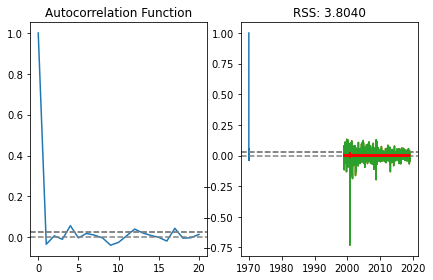

In [20]:
ts.dropna(inplace=True)
ts.head(5)
from statsmodels.tsa.stattools import adfuller


# In[77]:


print('results of dikey-fuller test:')
dftest=adfuller(ts, autolag='AIC')


# In[78]:


dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', '#observations'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]=value
    
print (dfoutput)


# In[79]:


ts_logScale=np.log(ts)
plt.plot(ts_logScale)


# In[80]:


movingAverage=ts_logScale.rolling(window=12).mean()
movingSTD=ts_logScale.rolling(window=12).std()
plt.plot(ts_logScale)
plt.plot(movingAverage, color='red')


# In[81]:


ts_LogScaleMinusMA=ts_logScale-movingAverage
ts_LogScaleMinusMA.head(12)
ts_LogScaleMinusMA.dropna(inplace=True)
ts_LogScaleMinusMA.head(10)


# In[84]:


from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    orig=plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(movingAverage, color='red', label='rMean')
    std=plt.plot(movingSTD, color='black', label='rStd')
    plt.legend(loc='best')
    plt.title('Rolling Mean & STD')
    plt.show(block=False)
    print('results of dikey-fuller test:')
    dftest=adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', '#observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]=value
    
    print (dfoutput)


# In[85]:


test_stationarity(ts_LogScaleMinusMA)


# In[86]:


exponentialDecayWeightedAverage=ts_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(ts_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')


# In[88]:


ts_LogScaleMinusExponentialDecayAverage= ts-exponentialDecayWeightedAverage
test_stationarity(ts_LogScaleMinusExponentialDecayAverage)


# In[89]:


ts_LogDiffShifting= ts_logScale-ts_logScale.shift()
plt.plot(ts_LogDiffShifting)


# In[90]:


ts_LogDiffShifting.dropna(inplace=True)
test_stationarity(ts_LogDiffShifting)


# In[92]:


ts_logScale.head()


# In[95]:


from statsmodels.tsa.seasonal import seasonal_decompose
ts_logScale.dropna(inplace=True)
decomposition = seasonal_decompose(ts_logScale, freq=30)
trend =decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid


# In[96]:


plt.subplot(411)
plt.plot(ts_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(ts_logScale, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(ts_logScale, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(ts_logScale, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


# In[97]:


decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


# In[100]:


from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(ts_LogDiffShifting, nlags=20)
lag_pacf=pacf(ts_LogDiffShifting, nlags=20, method='ols')


# In[101]:


plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_LogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_LogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_LogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_LogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


# In[114]:


from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(ts_logScale, order=(1,1,1))
results_AR = model.fit (disp=-1)
plt.plot(ts_LogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_LogDiffShifting)**2))
print('Plotting AR Model')


# In[115]:


model=ARIMA(ts_logScale, order=(1,1,1))
results_ARIMA = model.fit (disp=-1)
plt.plot(ts_LogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_LogDiffShifting)**2))


# In[117]:


predicitons_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predicitons_ARIMA_diff.head())


# In[118]:


predicitons_ARIMA_diff_cumsum=predicitons_ARIMA_diff.cumsum()
print(predicitons_ARIMA_diff_cumsum)


# In[121]:


predictions_ARIMA_log=pd.Series(ts_logScale.ix[0], index=ts_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predicitons_ARIMA_diff_cumsum, fill_value=0)


# In[123]:


predictions_ARIMA_log.head()


# In[124]:


predicitons_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predicitons_ARIMA)


# In[125]:


ts_logScale


# In[127]:


results_ARIMA.plot_predict(1,9575)


# In[132]:


results_ARIMA.forecast(14)
